In [155]:
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.2.2'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 2s (107 kB/s)
Reading package lis

In [156]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import plotly.express as px

In [157]:
ufo_data_df = pd.read_csv("/content/sample_data/ufo_pop_merge.csv")
ufo_data_df.head()

,Unnamed: 0,summary,date_time,shape,duration,stats,text,posted,city_latitude,city_longitude,key,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,Fleet of moving stars. ((Starlink satellites?)),2020-04-17T20:00:00,light,1 hour,Occurred : 4/17/2020 20:00 (Entered as : 04/1...,Fleet of moving stars Looked like moving stars...,2020-06-25T00:00:00,33.5178,-112.3667,Litchfield Park2020-04-17T20:00:00,2020-04-17,20:00:00,2020,4,17,Litchfield Park,AZ,2020,6847
1,1,Star-like UFO and strange sound.,2020-05-17T21:00:00,light,3 minutes,Occurred : 5/17/2020 21:00 (Entered as : 05/1...,Star-like UFO and strange sound had just seen ...,2020-06-25T00:00:00,33.5178,-112.3667,Litchfield Park2020-05-17T21:00:00,2020-05-17,21:00:00,2020,5,17,Litchfield Park,AZ,2020,6847
2,2,A cross shaped object illuminated with lights...,2004-07-20T19:45:00,cross,1 minute,Occurred : 7/20/2004 19:45 (Entered as : 07/2...,A cross shaped object illuminated with lights...,2004-09-29T00:00:00,33.5178,-112.3667,Litchfield Park2004-07-20T19:45:00,2004-07-20,19:45:00,2004,7,20,Litchfield Park,AZ,2004,3964
3,3,to dark to see color.,2004-04-20T08:45:00,triangle,8:45-8:47,Occurred : 4/20/2004 08:45 (Entered as : 04/2...,"to dark to see color. I'm 12 years old, i was ...",2004-08-11T00:00:00,33.5178,-112.3667,Litchfield Park2004-04-20T08:45:00,2004-04-20,08:45:00,2004,4,20,Litchfield Park,AZ,2004,3964
4,4,Strange craft with blinking lights in a solid ...,2005-08-19T20:30:00,triangle,3 minutes,Occurred : 8/19/2005 20:30 (Entered as : 08/1...,Strange craft with blinking lights in a solid ...,2005-10-11T00:00:00,33.5178,-112.3667,Litchfield Park2005-08-19T20:30:00,2005-08-19,20:30:00,2005,8,19,Litchfield Park,AZ,2005,4361


In [158]:
# Columns
ufo_data_df.columns

Index(['Unnamed: 0', 'summary', 'date_time', 'shape', 'duration', 'stats',
       'text', 'posted', 'city_latitude', 'city_longitude', 'key', 'date_str',
       'time_str', 'year', 'month_x', 'day_x', 'City', 'State', 'Year',
       'Population'],
      dtype='object')

In [159]:
# dataframe data types
ufo_data_df.dtypes

Unnamed: 0          int64
summary            object
date_time          object
shape              object
duration           object
stats              object
text               object
posted             object
city_latitude     float64
city_longitude    float64
key                object
date_str           object
time_str           object
year                int64
month_x             int64
day_x               int64
City               object
State              object
Year                int64
Population          int64
dtype: object

In [160]:
# Find any null values
for column in ufo_data_df.columns:
  print(f"Column {column} has {ufo_data_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column summary has 0 null values
Column date_time has 0 null values
Column shape has 0 null values
Column duration has 0 null values
Column stats has 0 null values
Column text has 0 null values
Column posted has 0 null values
Column city_latitude has 0 null values
Column city_longitude has 0 null values
Column key has 0 null values
Column date_str has 0 null values
Column time_str has 0 null values
Column year has 0 null values
Column month_x has 0 null values
Column day_x has 0 null values
Column City has 0 null values
Column State has 0 null values
Column Year has 0 null values
Column Population has 0 null values


In [161]:
# Find duplicates
print(f"Duplicate entries: {ufo_data_df.duplicated().sum()}")

Duplicate entries: 0


In [162]:
# Drop columns that are objects: summary, duration, stats, text, posted, state
ufo_data_df.drop(columns=["summary","duration", "stats", "text", "posted", "date_time", "key"], inplace=True)
ufo_data_df.head(20)


,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,light,33.517800,-112.366700,2020-04-17,20:00:00,2020,4,17,Litchfield Park,AZ,2020,6847
1,1,light,33.517800,-112.366700,2020-05-17,21:00:00,2020,5,17,Litchfield Park,AZ,2020,6847
2,2,cross,33.517800,-112.366700,2004-07-20,19:45:00,2004,7,20,Litchfield Park,AZ,2004,3964
3,3,triangle,33.517800,-112.366700,2004-04-20,08:45:00,2004,4,20,Litchfield Park,AZ,2004,3964
4,4,triangle,33.517800,-112.366700,2005-08-19,20:30:00,2005,8,19,Litchfield Park,AZ,2005,4361
5,5,light,33.517800,-112.366700,2005-09-13,20:40:00,2005,9,13,Litchfield Park,AZ,2005,4361
6,6,oval,33.517800,-112.366700,2008-03-23,11:30:00,2008,3,23,Litchfield Park,AZ,2008,5132
7,7,teardrop,33.517800,-112.366700,2009-05-18,19:20:00,2009,5,18,Litchfield Park,AZ,2009,5178
8,8,circle,33.517800,-112.366700,2011-02-11,19:00:00,2011,2,11,Litchfield Park,AZ,2011,4997
9,9,circle,33.517800,-112.366700,2011-03-18,19:40:00,2011,3,18,Litchfield Park,AZ,2011,4997


In [163]:
# Transform shape (object) column
def change_object(shape):
  if shape =="circle":
    return 1
  else:
    return 0

ufo_data_df["shape"] = ufo_data_df["shape"].apply(change_object)
ufo_data_df.head(20)

,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,0,33.517800,-112.366700,2020-04-17,20:00:00,2020,4,17,Litchfield Park,AZ,2020,6847
1,1,0,33.517800,-112.366700,2020-05-17,21:00:00,2020,5,17,Litchfield Park,AZ,2020,6847
2,2,0,33.517800,-112.366700,2004-07-20,19:45:00,2004,7,20,Litchfield Park,AZ,2004,3964
3,3,0,33.517800,-112.366700,2004-04-20,08:45:00,2004,4,20,Litchfield Park,AZ,2004,3964
4,4,0,33.517800,-112.366700,2005-08-19,20:30:00,2005,8,19,Litchfield Park,AZ,2005,4361
5,5,0,33.517800,-112.366700,2005-09-13,20:40:00,2005,9,13,Litchfield Park,AZ,2005,4361
6,6,0,33.517800,-112.366700,2008-03-23,11:30:00,2008,3,23,Litchfield Park,AZ,2008,5132
7,7,0,33.517800,-112.366700,2009-05-18,19:20:00,2009,5,18,Litchfield Park,AZ,2009,5178
8,8,1,33.517800,-112.366700,2011-02-11,19:00:00,2011,2,11,Litchfield Park,AZ,2011,4997
9,9,1,33.517800,-112.366700,2011-03-18,19:40:00,2011,3,18,Litchfield Park,AZ,2011,4997


In [164]:
# Transform shape (object) column
def change_object(State):
  if State =="AZ":
    return 1
  else:
    return 0

ufo_data_df["State"] = ufo_data_df["State"].apply(change_object)
ufo_data_df.head(20)

,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,0,33.517800,-112.366700,2020-04-17,20:00:00,2020,4,17,Litchfield Park,1,2020,6847
1,1,0,33.517800,-112.366700,2020-05-17,21:00:00,2020,5,17,Litchfield Park,1,2020,6847
2,2,0,33.517800,-112.366700,2004-07-20,19:45:00,2004,7,20,Litchfield Park,1,2004,3964
3,3,0,33.517800,-112.366700,2004-04-20,08:45:00,2004,4,20,Litchfield Park,1,2004,3964
4,4,0,33.517800,-112.366700,2005-08-19,20:30:00,2005,8,19,Litchfield Park,1,2005,4361
5,5,0,33.517800,-112.366700,2005-09-13,20:40:00,2005,9,13,Litchfield Park,1,2005,4361
6,6,0,33.517800,-112.366700,2008-03-23,11:30:00,2008,3,23,Litchfield Park,1,2008,5132
7,7,0,33.517800,-112.366700,2009-05-18,19:20:00,2009,5,18,Litchfield Park,1,2009,5178
8,8,1,33.517800,-112.366700,2011-02-11,19:00:00,2011,2,11,Litchfield Park,1,2011,4997
9,9,1,33.517800,-112.366700,2011-03-18,19:40:00,2011,3,18,Litchfield Park,1,2011,4997


In [165]:
#convert date_str column to float
ufo_data_df['date_str'] = ufo_data_df['date_str'].apply(lambda x:float(x.split()[0].replace('-','')))
print(ufo_data_df)

      Unnamed: 0  shape  city_latitude  city_longitude    date_str  time_str  \
0              0      0        33.5178       -112.3667  20200417.0  20:00:00   
1              1      0        33.5178       -112.3667  20200517.0  21:00:00   
2              2      0        33.5178       -112.3667  20040720.0  19:45:00   
3              3      0        33.5178       -112.3667  20040420.0  08:45:00   
4              4      0        33.5178       -112.3667  20050819.0  20:30:00   
...          ...    ...            ...             ...         ...       ...   
3138        3138      0        34.3249       -111.5487  20210528.0  02:30:00   
3139        3139      0        34.5151       -109.6950  20210508.0  20:05:00   
3140        3140      1        32.5376       -114.7138  20200212.0  21:30:00   
3141        3141      0        33.2734       -109.2711  20201006.0  19:13:00   
3142        3142      0        36.3900       -109.5977  20200114.0  18:45:00   

      year  month_x  day_x             

In [166]:
#convert time_str column to float
ufo_data_df['time_str'] = ufo_data_df['time_str'].apply(lambda x:float(x.split()[0].replace(':','')))
print(ufo_data_df)

      Unnamed: 0  shape  city_latitude  city_longitude    date_str  time_str  \
0              0      0        33.5178       -112.3667  20200417.0  200000.0   
1              1      0        33.5178       -112.3667  20200517.0  210000.0   
2              2      0        33.5178       -112.3667  20040720.0  194500.0   
3              3      0        33.5178       -112.3667  20040420.0   84500.0   
4              4      0        33.5178       -112.3667  20050819.0  203000.0   
...          ...    ...            ...             ...         ...       ...   
3138        3138      0        34.3249       -111.5487  20210528.0   23000.0   
3139        3139      0        34.5151       -109.6950  20210508.0  200500.0   
3140        3140      1        32.5376       -114.7138  20200212.0  213000.0   
3141        3141      0        33.2734       -109.2711  20201006.0  191300.0   
3142        3142      0        36.3900       -109.5977  20200114.0  184500.0   

      year  month_x  day_x             

In [167]:
# Encode string values into numeric values
City = {'Litchfield Park': 0, 'Tucson': 1, 'Phoenix':2, 'Gilbert':3, 'Tempe':4, 'Glendale':5, 'Mesa':6, 'Bullhead City':7, 'Peoria':8, 'Chandler':9, 'Cottonwood':10, 'Prescott':11, 'Payson':12, 'Page':13, 'Yuma':14, 'Sun City':15, 'Salome':16, 'Sierra Vista': 17, 'Prescott Valley':18, 'Sedona':19, 'Anthem':20, 'Lake Havasu City':21, 'Florence':22, 'Apache Junction':23, 'Queen Creek':24, 'Tonopah':25, 'Show Low':26, 'Scottsdale':27, 'Marana':28, 'Goodyear':29, 'Kingman':30, 'Buckeye':31, 'Arizona City':32, 'Cave Creek':33, 'Fountain Hills':34, 'Topock':35, 'Green Valley':36, 'Eloy':37, 'Amado':38, 'Nogales':39, 'Chino Valley':40, 'Surprise':41, 'Holbrook':42, 'Camp Verde':43, 'Paradise Valley':44, 'Maricopa':45, 'Quartzsite':46, 'Avondale':47, 'Bagdad':48, 'Morenci':49, 'Flagstaff':50, 'Safford':51, 'Douglas':52, 'Coolidge':53, 'Carefree':54, 'Casa Grande':55, 'Gila Bend':56, 'Tombstone':57, 'Huachuca City':58, 'Clarkdale':59, 'Pima':60, 'Patagonia':61, 'Williams':62, 'Sahuarita':63, 'Globe':64, 'Benson':65, 'Tolleson':66, 'Kearny':66, 'Wickenburg':67, 'Snowflake':68, 'Winslow':69, 'Parker':70, 'Willcox':71, 'San Luis':72, 'Springerville':73, 'Whiteriver':74, 'Wellton':75, 'Eagar':76, 'Duncan':77, 'El Mirage':78, 'Thatcher':79, 'Pine':80, 'Concho':81, 'Somerton':82, 'Clifton':83, 'Many Farms':84, 'Sonoita':85}
ufo_data_df.City = [City[item] for item in ufo_data_df.City]
ufo_data_df = ufo_data_df.replace({'City': City})

In [168]:
ufo_data_df

,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population
0,0,0,33.5178,-112.3667,20200417.0,200000.0,2020,4,17,0,1,2020,6847
1,1,0,33.5178,-112.3667,20200517.0,210000.0,2020,5,17,0,1,2020,6847
2,2,0,33.5178,-112.3667,20040720.0,194500.0,2004,7,20,0,1,2004,3964
3,3,0,33.5178,-112.3667,20040420.0,84500.0,2004,4,20,0,1,2004,3964
4,4,0,33.5178,-112.3667,20050819.0,203000.0,2005,8,19,0,1,2005,4361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,3138,0,34.3249,-111.5487,20210528.0,23000.0,2021,5,28,80,1,2021,1951
3139,3139,0,34.5151,-109.6950,20210508.0,200500.0,2021,5,8,81,1,2021,58
3140,3140,1,32.5376,-114.7138,20200212.0,213000.0,2020,2,12,82,1,2020,14197
3141,3141,0,33.2734,-109.2711,20201006.0,191300.0,2020,10,6,83,1,2020,3933


In [169]:
print(ufo_data_df)

      Unnamed: 0  shape  city_latitude  city_longitude    date_str  time_str  \
0              0      0        33.5178       -112.3667  20200417.0  200000.0   
1              1      0        33.5178       -112.3667  20200517.0  210000.0   
2              2      0        33.5178       -112.3667  20040720.0  194500.0   
3              3      0        33.5178       -112.3667  20040420.0   84500.0   
4              4      0        33.5178       -112.3667  20050819.0  203000.0   
...          ...    ...            ...             ...         ...       ...   
3138        3138      0        34.3249       -111.5487  20210528.0   23000.0   
3139        3139      0        34.5151       -109.6950  20210508.0  200500.0   
3140        3140      1        32.5376       -114.7138  20200212.0  213000.0   
3141        3141      0        33.2734       -109.2711  20201006.0  191300.0   
3142        3142      0        36.3900       -109.5977  20200114.0  184500.0   

      year  month_x  day_x  City  State

In [170]:
# City names have been replaced with numbers
ufo_data_df['City'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 85, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84])

In [171]:
# Initializing model with K = 3 (as a test)
model = KMeans(n_clusters=3, random_state=5)
model

KMeans(n_clusters=3, random_state=5)

In [172]:
# Fitting model
model.fit(ufo_data_df)

KMeans(n_clusters=3, random_state=5)

In [173]:
# Predictions
predictions = model.predict(ufo_data_df)
print(predictions)

[0 0 0 ... 0 0 0]


In [174]:
ufo_data_df['City'].value_counts().head(20)

2     617
1     370
6     215
27    144
3     144
9     138
4     107
5     101
41     77
19     74
21     73
8      71
45     65
14     61
31     54
30     51
18     49
24     46
11     43
50     41
Name: City, dtype: int64

In [175]:
# Add a new class column to ufo_data_df
ufo_data_df["class"] = model.labels_
ufo_data_df.head()


,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population,class
0,0,0,33.5178,-112.3667,20200417.0,200000.0,2020,4,17,0,1,2020,6847,0
1,1,0,33.5178,-112.3667,20200517.0,210000.0,2020,5,17,0,1,2020,6847,0
2,2,0,33.5178,-112.3667,20040720.0,194500.0,2004,7,20,0,1,2004,3964,0
3,3,0,33.5178,-112.3667,20040420.0,84500.0,2004,4,20,0,1,2004,3964,0
4,4,0,33.5178,-112.3667,20050819.0,203000.0,2005,8,19,0,1,2005,4361,0


In [111]:
!pip install pyviz hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.4 MB 299 kB/s 
     |████████████████████████████████| 3.2 MB 43.8 MB/s 
     |████████████████████████████████| 504 kB 43.8 MB/s 
     |████████████████████████████████| 764 kB 48.7 MB/s 
     |████████████████████████████████| 13.0 MB 46.4 MB/s 
     |████████████████████████████████| 1.5 MB 42.9 MB/s 
     |████████████████████████████████| 4.3 MB 10.1 MB/s 
     |████████████████████████████████| 76 kB 5.9 MB/s 
     |████████████████████████████████| 10.1 MB 58.8 MB/s 
     |████████████████████████████████| 18.2 MB 908 kB/s 
     |████████████████████████████████| 995 kB 66.1 MB/s 
     |████████████████████████████████| 1.1 MB 8.1 MB/s 
     |████████████████████████████████| 1.0 MB 54.7 MB/s 
     |████████████████████████████████| 822 kB 55.3 MB/s 
     |████████████████████████████████| 1.0 MB 66.1 MB/s 
     |██████████████████████████

In [176]:
import plotly.express as px
import matplotlib
import hvplot.pandas
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

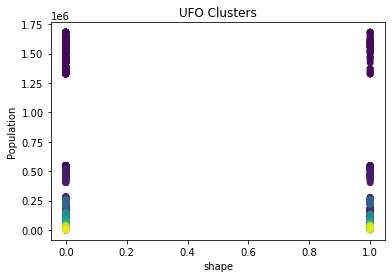

In [177]:
# Plotting the clusters with two features
plt.scatter(x=ufo_data_df["shape"], y=ufo_data_df["Population"], c=ufo_data_df["City"])
plt.xlabel("shape")
plt.ylabel("Population")
plt.title("UFO Clusters")
plt.show

# Initial cluster do not delete yet- ufo_data_df.hvplot.scatter(x="shape", y="Population", by="City")


In [182]:
# Plotting the clusters wth three features
fig= px.scatter_3d(
    ufo_data_df,
    x="shape",
    y="month_x",
    z="Population",
    color="City",
    symbol="City",
    size="Population",
    width=800
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [204]:
ufo_data_df.head(50)

,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population,class
0,0,0,33.517800,-112.366700,20200417.0,200000.0,2020,4,17,0,1,2020,6847,0
1,1,0,33.517800,-112.366700,20200517.0,210000.0,2020,5,17,0,1,2020,6847,0
2,2,0,33.517800,-112.366700,20040720.0,194500.0,2004,7,20,0,1,2004,3964,0
3,3,0,33.517800,-112.366700,20040420.0,84500.0,2004,4,20,0,1,2004,3964,0
4,4,0,33.517800,-112.366700,20050819.0,203000.0,2005,8,19,0,1,2005,4361,0
5,5,0,33.517800,-112.366700,20050913.0,204000.0,2005,9,13,0,1,2005,4361,0
6,6,0,33.517800,-112.366700,20080323.0,113000.0,2008,3,23,0,1,2008,5132,0
7,7,0,33.517800,-112.366700,20090518.0,192000.0,2009,5,18,0,1,2009,5178,0
8,8,1,33.517800,-112.366700,20110211.0,190000.0,2011,2,11,0,1,2011,4997,0
9,9,1,33.517800,-112.366700,20110318.0,194000.0,2011,3,18,0,1,2011,4997,0


In [214]:
# Create a training set 'X' with every column except 'Unnamed: 0'
df = ufo_data_df.dropna()
X = ufo_data_df.drop('Unnamed: 0', axis=1)

In [215]:
ufo_data_df.head(50)

,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population,class
0,0,0,33.517800,-112.366700,20200417.0,200000.0,2020,4,17,0,1,2020,6847,0
1,1,0,33.517800,-112.366700,20200517.0,210000.0,2020,5,17,0,1,2020,6847,0
2,2,0,33.517800,-112.366700,20040720.0,194500.0,2004,7,20,0,1,2004,3964,0
3,3,0,33.517800,-112.366700,20040420.0,84500.0,2004,4,20,0,1,2004,3964,0
4,4,0,33.517800,-112.366700,20050819.0,203000.0,2005,8,19,0,1,2005,4361,0
5,5,0,33.517800,-112.366700,20050913.0,204000.0,2005,9,13,0,1,2005,4361,0
6,6,0,33.517800,-112.366700,20080323.0,113000.0,2008,3,23,0,1,2008,5132,0
7,7,0,33.517800,-112.366700,20090518.0,192000.0,2009,5,18,0,1,2009,5178,0
8,8,1,33.517800,-112.366700,20110211.0,190000.0,2011,2,11,0,1,2011,4997,0
9,9,1,33.517800,-112.366700,20110318.0,194000.0,2011,3,18,0,1,2011,4997,0


In [217]:
# Scale the dataset using MinMaxScaler()
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[0.00000000e+00, 3.94843884e-01, 4.23348581e-01, ...,
        9.52380952e-01, 4.07200519e-03, 0.00000000e+00],
       [0.00000000e+00, 3.94843884e-01, 4.23348581e-01, ...,
        9.52380952e-01, 4.07200519e-03, 0.00000000e+00],
       [0.00000000e+00, 3.94843884e-01, 4.23348581e-01, ...,
        1.90476190e-01, 2.35694442e-03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 2.07657787e-01, 1.19880120e-02, ...,
        9.52380952e-01, 8.44442858e-03, 0.00000000e+00],
       [0.00000000e+00, 3.48171489e-01, 9.65893755e-01, ...,
        9.52380952e-01, 2.33850291e-03, 0.00000000e+00],
       [0.00000000e+00, 9.43340017e-01, 9.08652751e-01, ...,
        9.52380952e-01, 7.38255433e-04, 0.00000000e+00]])

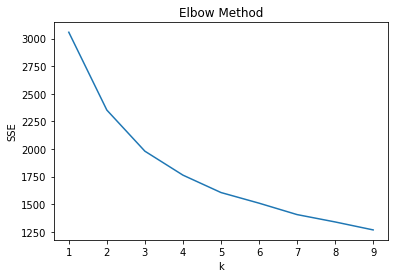

In [218]:
sse = {}
K = range(1,10)
for k in K:
    kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    sse[k]= kmeanmodel.inertia_
    
# Plot
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [219]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

In [220]:
 # Calculate predicted values.
y_pred = model.predict(X_scaled)

In [221]:
 # Add prediected values onto the original dataframe
ufo_data_df_y = pd.DataFrame(y_pred, columns=['Cluster'])
combined = ufo_data_df.join(ufo_data_df_y, how='inner')
combined.head()

,Unnamed: 0,shape,city_latitude,city_longitude,date_str,time_str,year,month_x,day_x,City,State,Year,Population,class,Cluster
0,0,0,33.5178,-112.3667,20200417.0,200000.0,2020,4,17,0,1,2020,6847,0,2
1,1,0,33.5178,-112.3667,20200517.0,210000.0,2020,5,17,0,1,2020,6847,0,2
2,2,0,33.5178,-112.3667,20040720.0,194500.0,2004,7,20,0,1,2004,3964,0,1
3,3,0,33.5178,-112.3667,20040420.0,84500.0,2004,4,20,0,1,2004,3964,0,1
4,4,0,33.5178,-112.3667,20050819.0,203000.0,2005,8,19,0,1,2005,4361,0,1


In [ ]:
# From original kmean file (can be deleted if new one works)


# ufo_data_df['month_x'] = ufo_data_df['month_x'].apply(lambda x: x if x in ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12') else 'Other')
# ufo_data_df[['time_str']] = ufo_data_df[['time_str']].apply(pd.to_timedelta).apply(lambda x: x.dt.total_seconds())
# X = ufo_data_df[['month_x','time_str', 'city_latitude', 'city_longitude', 'Population']].copy()
# X['city_latitude'] = LabelEncoder().fit_transform(X['city_latitude'])
# X['city_longitude'] = LabelEncoder().fit_transform(X['city_longitude'])
# X = X.dropna()
# X.head()
# X = X.dropna('Other')
# X.head()
# # Scale the dataset using MinMaxScaler()
# X_scaled = MinMaxScaler().fit_transform(X)
# X_scaled
# sse = {}
# K = range(1, 10)
# for k in K:
    # kmeanmodel = KMeans(n_clusters=k).fit(X_scaled)
    # sse[k]= kmeanmodel.inertia_
    
# Plot
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel('k')
# plt.ylabel('SSE')
# plt.title('Elbow Method')
# plt.show()

# # Create a KMeans model with 3 clusters
# model = KMeans(n_clusters=3, random_state=42).fit(X_scaled)

# # Calculate predicted values.
# y_pred = model.predict(X_scaled)

# # Add prediected values onto the original dataframe
# ufo_data_df_y = pd.DataFrame(y_pred, columns=['Cluster'])
# combined = ufo_data_df.join(ufo_data_df_y, how='inner')
# combined.head()

# # Plot boxplots of the official time distributions by cluster
# combined.boxplot(['month_x'], by=['Cluster'])

# Plot median finish times by division for each cluster
# combined[combined['Cluster'] == 0].groupby('city_latitude', 'city_longitude').median()['month_x'].plot()
# combined[combined['Cluster'] == 1].groupby('city_latitude', 'city_longitude').median()['month_x'].plot()
# combined[combined['Cluster'] == 2].groupby('city_latitude', 'city_longitude').median()['month_x'].plot()